## Import Packages and Read in Simulation Results

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline

results_df = pd.read_csv('catan_simulation_results_1000.csv')

## Create x and y variables and feed into scikitlearn Linear Regression engine

In [2]:
X = results_df[['WHEAT', 'ORE', 'WOOD', 'BRICK', 'SHEEP']].values
y = results_df['POINTS PER TURN'].values

In [3]:
regressor = LinearRegression()  
regressor.fit(X, y);

## Create DataFrame out of each resource's linear regression coeffecient

In [4]:
coeff_df = pd.DataFrame(regressor.coef_, ['WHEAT', 'ORE', 'WOOD', 'BRICK', 'SHEEP'], columns=['Coefficient'])  
coeff_df

,Coefficient
WHEAT,0.006834
ORE,0.005913
WOOD,0.003739
BRICK,0.004712
SHEEP,0.003394


## Normalize Coefficients to show relative value of each resource

In [5]:
coeff_df['Coefficient'] = (coeff_df['Coefficient'] / coeff_df['Coefficient'].max())
coeff_df

,Coefficient
WHEAT,1.000000
ORE,0.865207
WOOD,0.547168
BRICK,0.689505
SHEEP,0.496679


# Visualize Results in a Bar Chart

In [6]:
#https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 3)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=24)

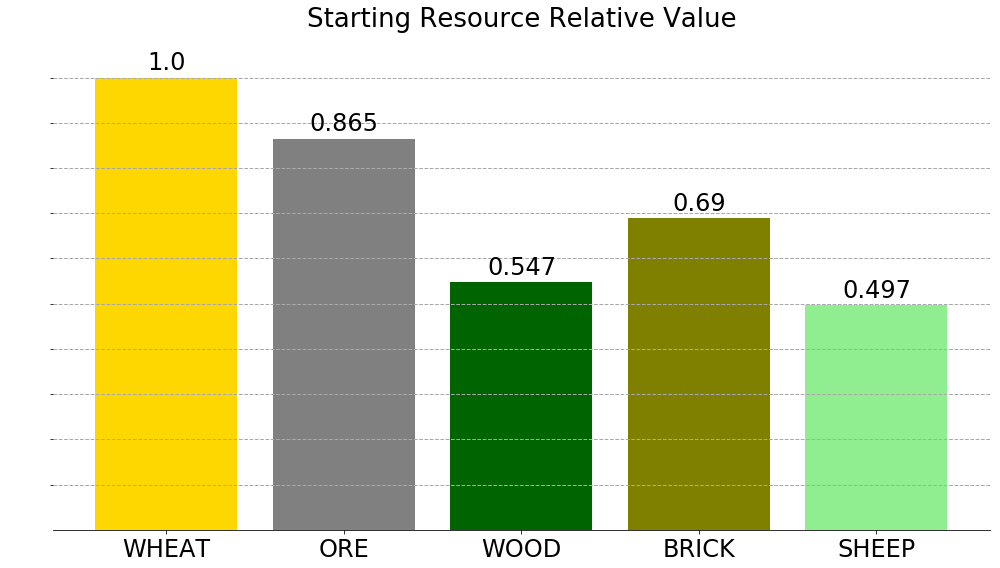

In [7]:
fig, ax = plt.subplots(figsize=(14,8))

rects = plt.bar(coeff_df.index, height = coeff_df['Coefficient'], color=['gold','gray', 'darkgreen', 'olive', 'lightgreen'])

plt.title('Starting Resource Relative Value', fontsize=26)
plt.xticks(fontsize=24, color='black')
plt.yticks([.1,.2,.3,.4,.5,.6,.7,.8,.9,1],fontsize=24, color='white')
plt.grid(axis='y', linestyle='--', linewidth = 1, color = 'darkgray')
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.ylim(0,1.1)
autolabel(rects)

fig.tight_layout()
plt.savefig('Starting_Resource_Values.png')
plt.show()